<a href="https://colab.research.google.com/github/piyongii/WAD-SHAFIRA-102092400084/blob/main/Tubes_Titanic_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data exploration dan data preparation**

1. Eksplorasi Data (Data Exploration):

- Tampilkan informasi umum mengenai dataset (jumlah baris dan kolom, nama atribut, tipe data).

- Identifikasi nilai yang hilang (missing values) dan outlier.

- Lakukan analisis statistik deskriptif untuk variabel numerik (mean, median, standard deviation, dll).

- Buat visualisasi awal (misalnya: histogram, boxplot, scatterplot, correlation matrix) untuk melihat distribusi dan hubungan antar variabel.

Mengimpor data set ke google colab

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import pandas as pd

path = '/content/drive/MyDrive/Titanic-Dataset.csv'
df = pd.read_csv(path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.1 Informasi umum mengenai dataset


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.2 Identifikasi nilai yang hilang (missing values) dan outlier.

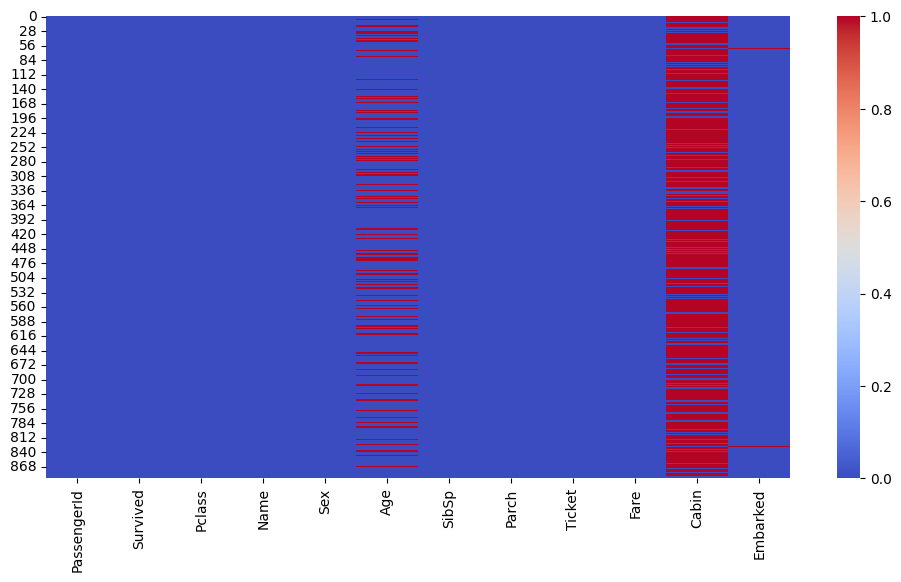

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm')
plt.show()

In [134]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [135]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("=== DETEKSI OUTLIER (IQR METHOD) ===")
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  - Lower bound: {lower:.2f}")
    print(f"  - Upper bound: {upper:.2f}")
    print(f"  - Jumlah outlier: {len(outliers)}")
    print(f"  - Persentase outlier: {(len(outliers)/len(df))*100:.2f}%")

=== DETEKSI OUTLIER (IQR METHOD) ===

PassengerId:
  - Lower bound: -444.00
  - Upper bound: 1336.00
  - Jumlah outlier: 0
  - Persentase outlier: 0.00%

Survived:
  - Lower bound: -1.50
  - Upper bound: 2.50
  - Jumlah outlier: 0
  - Persentase outlier: 0.00%

Pclass:
  - Lower bound: 0.50
  - Upper bound: 4.50
  - Jumlah outlier: 0
  - Persentase outlier: 0.00%

Age:
  - Lower bound: -6.69
  - Upper bound: 64.81
  - Jumlah outlier: 11
  - Persentase outlier: 1.23%

SibSp:
  - Lower bound: -1.50
  - Upper bound: 2.50
  - Jumlah outlier: 46
  - Persentase outlier: 5.16%

Parch:
  - Lower bound: 0.00
  - Upper bound: 0.00
  - Jumlah outlier: 213
  - Persentase outlier: 23.91%

Fare:
  - Lower bound: -26.72
  - Upper bound: 65.63
  - Jumlah outlier: 116
  - Persentase outlier: 13.02%


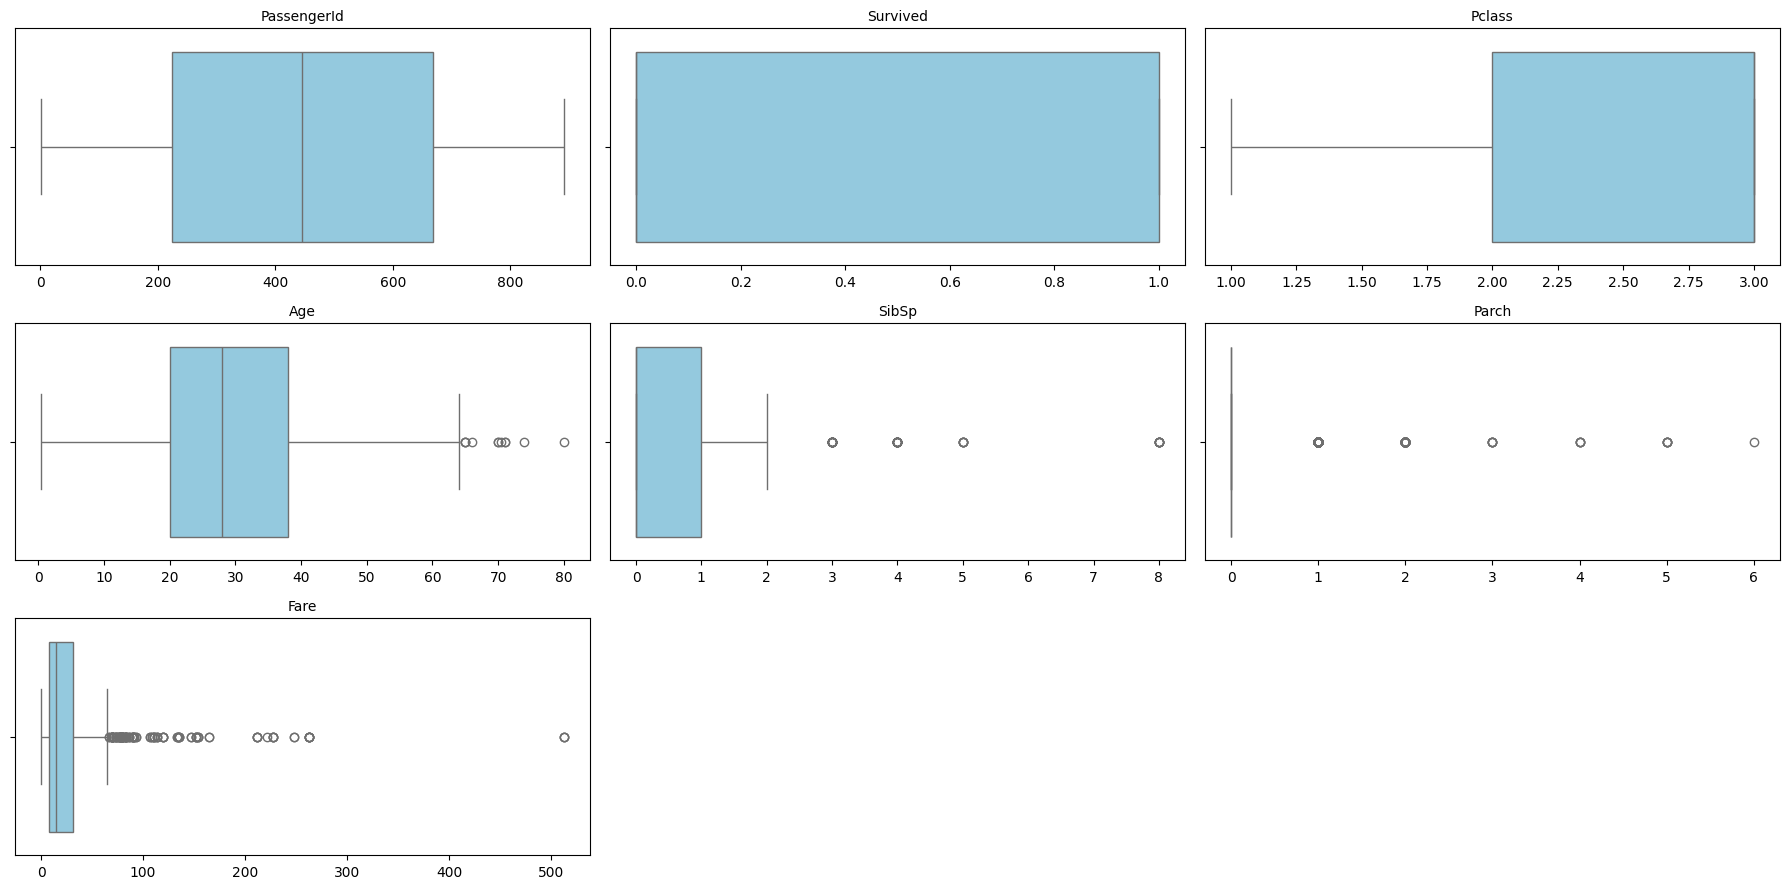

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='skyblue')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

1.3 Lakukan analisis statistik deskriptif untuk variabel numerik (mean, median, standard deviation, dll).

1.4 Buat visualisasi awal (misalnya: histogram, boxplot, scatterplot, correlation matrix) untuk melihat distribusi dan hubungan antar variabel.

In [137]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


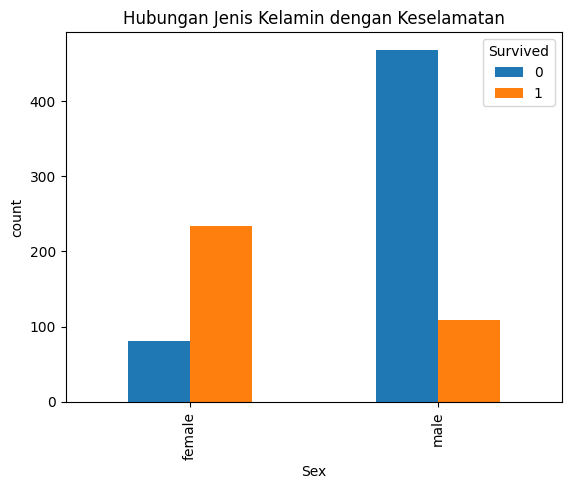

In [138]:
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar') #tambahan
plt.title('Hubungan Jenis Kelamin dengan Keselamatan')
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

2. Persiapan Data (Data Preparation):

- Tangani nilai yang hilang dengan metode yang sesuai (penghapusan atau imputasi).

- Lakukan pengkodean untuk variabel kategorikal (misalnya: label encoding atau one-hot encoding).

- Lakukan normalisasi atau standarisasi terhadap fitur numerik (jika diperlukan).

- Bersihkan data dari duplikasi atau entri yang tidak konsisten.



2.1 Tangani nilai yang hilang dengan metode yang sesuai (penghapusan dan imputasi).

In [139]:
from scipy.stats import chi2_contingency #selection p-value < 0.05 → fitur berpengaruh signifikan, p-value ≥ 0.05 → fitur tidak signifikan → layak dihapus

df['HasCabin'] = df['Cabin'].notna().astype(int)

# tabel kontingensi
contingency = pd.crosstab(df['HasCabin'], df['Survived'])

chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p_value)

Chi-square: 87.94148561238097
p-value: 6.7419704360811776e-21


In [140]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['PassengerId'], inplace=True, errors='ignore')
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df.drop(columns=['HasCabin'], inplace=True, errors='ignore')
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


2.2 Lakukan pengkodean untuk variabel kategorikal (misalnya: label encoding atau one-hot encoding).

In [141]:
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [142]:
# Identifikasi variabel kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variabel kategorikal:")
print(categorical_cols.tolist())

# Cek unique values untuk setiap kolom kategorikal
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Jumlah unique: {df[col].nunique()}")
    print(f"  Unique values: {df[col].unique()}")


from sklearn.preprocessing import LabelEncoder

df = df.copy()
label_encoders = {}

for col in categorical_cols:
    if df[col].nunique() <= 10:  # Hanya untuk kategori dengan unique values <= 10
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nData setelah Label Encoding:")
print(df.head())


Variabel kategorikal:
['Name', 'Sex', 'Ticket', 'Embarked']

Name:
  Jumlah unique: 891
  Unique values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansso

2.3 Lakukan normalisasi atau standarisasi terhadap fitur numerik (jika diperlukan) #Dataset kami tidak perlu

2.4 Bersihkan data dari duplikasi atau entri yang tidak konsisten.



In [143]:
# Cek duplikasi seluruh baris
print("=== CEK DUPLIKASI ===")
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

if duplicate_rows > 0:
    print("\nBaris duplikat:")
    print(df[df.duplicated()])
else:
    print("Tidak ada baris duplikat lengkap")

=== CEK DUPLIKASI ===
Jumlah baris duplikat: 0
Tidak ada baris duplikat lengkap


3. **Pemodelan (Modeling)**

In [144]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

# Hapus kolom 'Name' dan 'Ticket' karena merupakan objek dan tidak relevan untuk training
x = x.drop(columns=['Name', 'Ticket'], errors='ignore')

# Gunakan kode Anda
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# VERIFIKASI: Hitung persentase
total_data = len(x)
train_size = len(x_train)
test_size = len(x_test)

print("====Pembagian Data Latih dan Data Uji====")
print(f"Total data        : {total_data} baris")
print(f"Train set (80%)   : {train_size} baris")
print(f"Test set (20%)    : {test_size} baris")
print(f"Rasio Train:Test  : {train_size}:{test_size}")

====Pembagian Data Latih dan Data Uji====
Total data        : 891 baris
Train set (80%)   : 712 baris
Test set (20%)    : 179 baris
Rasio Train:Test  : 712:179


2. **Evaluasi Model**

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

roc_dt = roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_dt)

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Confusion Matrix:
 [[83 22]
 [17 57]]
ROC-AUC: 0.8001930501930501


In [146]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

roc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_rf)

model = rf

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
ROC-AUC: 0.8988416988416987


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Inisialisasi model
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Cross Validation 5-Fold
cv_scores = cross_val_score(
    lr,
    x, y,
    cv=5,
    scoring='accuracy'
)

print("Accuracy tiap fold:", cv_scores)
print("Rata-rata accuracy:", cv_scores.mean())

Accuracy tiap fold: [0.7877095  0.79775281 0.78089888 0.76404494 0.82022472]
Rata-rata accuracy: 0.7901261691042621


3. Cross Validation

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define skf here, as it was defined in a later cell previously.
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

#Cross Validation Decission Tree
dt = DecisionTreeClassifier(random_state=42)

cv_dt = cross_val_score(
    dt,
    x, y,
    cv=skf,
    scoring='accuracy'
)

print("Decision Tree - Accuracy tiap fold:", cv_dt)
print("Decision Tree - Rata-rata accuracy:", cv_dt.mean())

Decision Tree - Accuracy tiap fold: [0.78212291 0.83707865 0.74157303 0.75280899 0.79775281]
Decision Tree - Rata-rata accuracy: 0.7822672776348


In [149]:
#Cross Validation Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

cv_rf = cross_val_score(
    rf,
    x, y,
    cv=skf,
    scoring='accuracy'
)

print("Random Forest - Accuracy tiap fold:", cv_rf)
print("Random Forest - Rata-rata accuracy:", cv_rf.mean())


Random Forest - Accuracy tiap fold: [0.83798883 0.81460674 0.78651685 0.82022472 0.83707865]
Random Forest - Rata-rata accuracy: 0.8192831586215554


In [150]:
# ===== Logistic Regression + Scaling - Cross Validation =====

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
])

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_scores = cross_val_score(
    pipeline_lr,
    x, y,
    cv=skf,
    scoring='accuracy'
)

print("Logistic Regression (Scaled) - Accuracy tiap fold:", cv_scores)
print("Logistic Regression (Scaled) - Rata-rata accuracy:", cv_scores.mean())


Logistic Regression (Scaled) - Accuracy tiap fold: [0.76536313 0.80337079 0.78651685 0.78089888 0.8258427 ]
Logistic Regression (Scaled) - Rata-rata accuracy: 0.7923984683949532


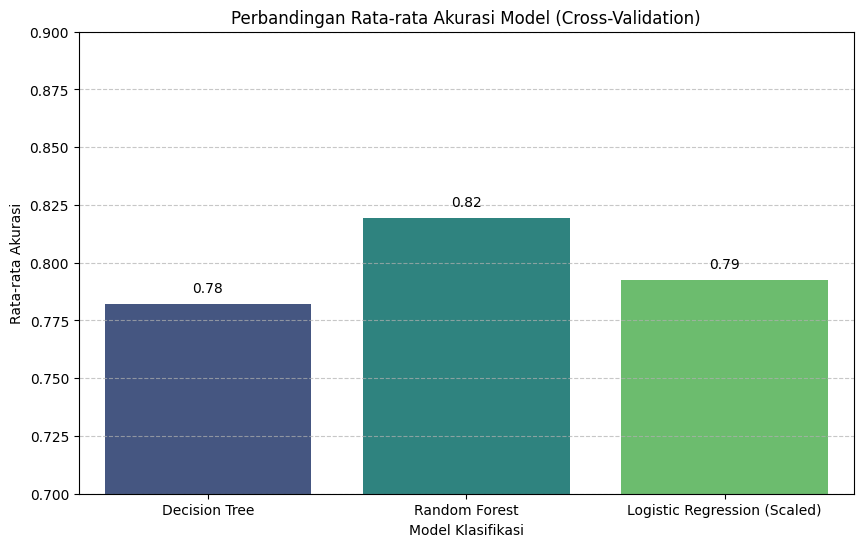

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ambil rata-rata akurasi dari hasil cross-validation
mean_accuracy_dt = cv_dt.mean()
mean_accuracy_rf = cv_rf.mean()
mean_accuracy_lr_scaled = cv_scores.mean()

# Buat DataFrame untuk visualisasi
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression (Scaled)']
mean_accuracies = [mean_accuracy_dt, mean_accuracy_rf, mean_accuracy_lr_scaled]

df_results = pd.DataFrame({
    'Model': model_names,
    'Mean Accuracy': mean_accuracies
})

# Visualisasi dengan Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Accuracy', hue='Model', data=df_results, palette='viridis', legend=False)
plt.title('Perbandingan Rata-rata Akurasi Model (Cross-Validation)')
plt.xlabel('Model Klasifikasi')
plt.ylabel('Rata-rata Akurasi')
plt.ylim(0.7, 0.9) # Sesuaikan batas y agar perbedaan lebih terlihat
for index, row in df_results.iterrows():
    plt.text(index, row['Mean Accuracy'] + 0.005, f'{row['Mean Accuracy']:.2f}', color='black', ha="center")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [186]:
import pandas as pd

# 1. Access feature_importances_ from the trained Random Forest model (rf)
feature_importances = rf.feature_importances_

# 2. Create a Pandas Series to store these importances, mapping them to their corresponding feature names from x_train
feature_names = x_train.columns
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False);

# 4. Print the sorted feature importances
print("Feature Importances (Random Forest):")
print(sorted_feature_importances)

Feature Importances (Random Forest):
Sex         0.271410
Fare        0.265010
Age         0.249995
Pclass      0.086957
SibSp       0.053685
Parch       0.039897
Embarked    0.033044
dtype: float64


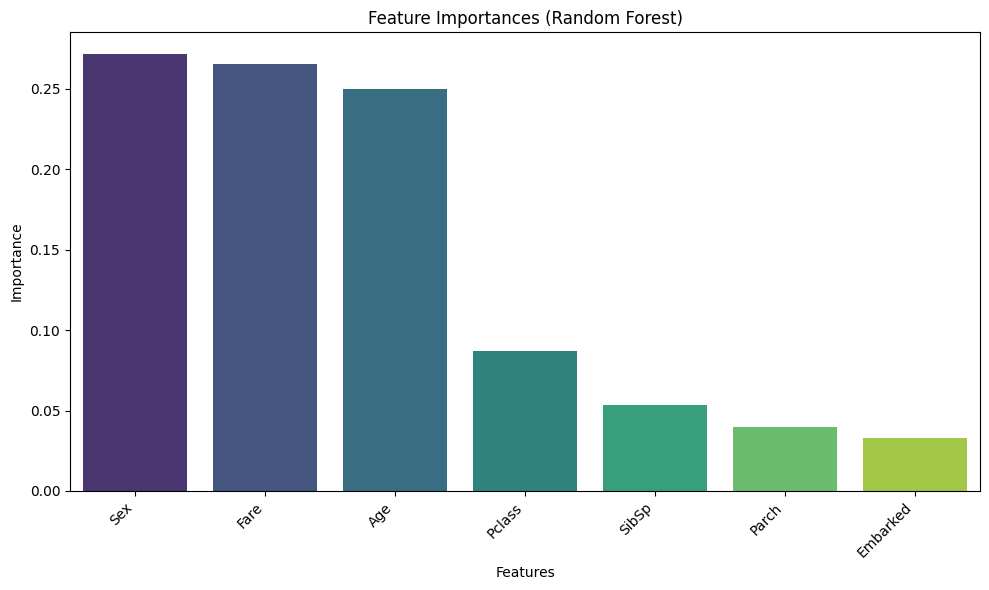

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, hue=sorted_feature_importances.index, palette='viridis', legend=False)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**4.Modelling**

In [152]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [153]:
!pip install pyngrok

In [193]:
!ngrok authtoken 37MbAymxnstOBy7mH3JtKWN1c43_7te1Xn1YC3UgbMMyNRRw5

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [194]:
!pip install streamlit

In [195]:
import streamlit as st

In [196]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("model.pkl")

st.title("🚢 Titanic Survival Prediction")
st.write("Prediksi apakah penumpang akan **Survive** atau **Not Survive**")

pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["Male", "Female"])
age = st.number_input("Age", min_value=0.0, max_value=100.0, value=0.42)
fare = st.number_input("Fare", min_value=0.0, value=32.0)
embarked = st.selectbox("Embarked", ["S", "C", "Q"])
sibsp = st.number_input("SibSp", min_value=0, max_value=10, value=0)
parch = st.number_input("Parch", min_value=0, max_value=10, value=0)

# Encoding manual (HARUS sama dg training)
sex_encoded = 1 if sex == "Female" else 0
embarked_map = {"S": 0, "C": 1, "Q": 2}
embarked_encoded = embarked_map[embarked]

input_data = np.array([[pclass, sex_encoded, age, fare, embarked_encoded, sibsp, parch]])

if st.button("Predict"):
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f"🟢 Survived")
    else:
        st.error(f"🔴 Not Survived")

Overwriting app.py


In [197]:
from pyngrok import ngrok

# Terminate any ngrok tunnels currently running
ngrok.kill()

# Start ngrok tunnel for Streamlit app (port 8501 is default for Streamlit)
public_url = ngrok.connect(8501)
print(f"Streamlit App URL: {public_url}")

Streamlit App URL: NgrokTunnel: "https://touchily-noncrenated-saul.ngrok-free.dev" -> "http://localhost:8501"


### Menghapus Fitur dengan Kepentingan Rendah

Berdasarkan analisis feature importance dari model Random Forest, fitur 'Parch' dan 'Embarked' memiliki skor kepentingan terendah. Untuk menyederhanakan model dan mengevaluasi dampaknya terhadap kinerja, kedua fitur ini akan dihapus dari dataset.

In [192]:
df_reduced = df.drop(columns=['Parch', 'Embarked'], errors='ignore')

print("Shape DataFrame setelah menghapus fitur 'Parch' dan 'Embarked':", df_reduced.shape)
print("\nHead DataFrame setelah penghapusan fitur:")
print(df_reduced.head())

Shape DataFrame setelah menghapus fitur 'Parch' dan 'Embarked': (891, 8)

Head DataFrame setelah penghapusan fitur:
   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp            Ticket     Fare  
0  22.0      1         A/5 21171   7.2500  
1  38.0      1          PC 17599  71.2833  
2  26.0      0  STON/O2. 3101282   7.9250  
3  35.0      1            113803  53.1000  
4  35.0      0            373450   8.0500  


# Task
The `Cabin` column has 687 missing values, which is a significant portion of the dataset, justifying its removal. I will now drop the `Cabin` and `PassengerId` columns and handle the missing values in `Age` and `Embarked` as planned.

```python
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df.drop(columns=['PassengerId'], inplace=True, errors='ignore')
df.isnull().sum()
```

## Analyze missing values for 'Cabin'

### Subtask:
Reconfirm the high percentage of missing values in the 'Cabin' column to justify its removal, referencing the output of `df.isnull().sum()`.


### Reconfirming Missing Values in 'Cabin'

From the output of `df.isnull().sum()` (cell `gBW8dqFrfoEZ`):

- The 'Cabin' column has **687** missing values.

Given that the total number of entries in the dataset is 891 (from `df.info()` in cell `4ktQd7eTem91`), 687 missing values represent approximately `(687 / 891) * 100 = 77.10%` of the data for this column. This is a very significant portion, confirming that the 'Cabin' column has a high percentage of missing values, which justifies its removal as it would likely not contribute meaningfully to the analysis or modeling.

## Drop 'Cabin' and 'PassengerId' columns and handle missing values for 'Age' and 'Embarked'

### Subtask:
Drop the 'Cabin' and 'PassengerId' columns, fill missing values in 'Age' with its median, and fill missing values in 'Embarked' with its mode.


**Reasoning**:
The subtask requires handling missing values in 'Age' and 'Embarked' columns, and dropping 'Cabin' and 'PassengerId' columns. The provided code block in cell `J18mFH6LJBRF` performs exactly these operations.



In [158]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df.drop(columns=['PassengerId'], inplace=True, errors='ignore')
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


## Lakukan pengkodean untuk variabel kategorikal (misalnya: label encoding atau one-hot encoding)

### Subtask:
Perform label encoding on suitable categorical variables.


### Identifying Categorical Columns

From the output of `df.dtypes` in cell `cG1So2piBB86` and further analysis in cell `BavO1c_4mrRG`, the categorical columns were identified as 'Name', 'Sex', 'Ticket', and 'Embarked'.

The instructions specify applying label encoding to 'Sex' and 'Embarked' due to their limited unique values. The existing code in cell `BavO1c_4mrRG` intelligently handles this by encoding columns with 10 or fewer unique values, which includes 'Sex' and 'Embarked'.

### Identifying Categorical Columns

From the output of `df.dtypes` in cell `cG1So2piBB86` and further analysis in cell `BavO1c_4mrRG`, the categorical columns were identified as 'Name', 'Sex', 'Ticket', and 'Embarked'.

The instructions specify applying label encoding to 'Sex' and 'Embarked' due to their limited unique values. The existing code in cell `BavO1c_mrRG` intelligently handles this by encoding columns with 10 or fewer unique values, which includes 'Sex' and 'Embarked'.

**Reasoning**:
The markdown block has been added as requested, explaining the context of categorical column identification and the planned label encoding. Now, I will execute the provided code block that performs the label encoding on the `Sex` and `Embarked` columns, as it aligns with the subtask's requirements and previous discussion.



In [159]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variabel kategorikal:")
print(categorical_cols.tolist())

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Jumlah unique: {df[col].nunique()}")
    print(f"  Unique values: {df[col].unique()}")


from sklearn.preprocessing import LabelEncoder

df = df.copy()
label_encoders = {}

for col in categorical_cols:
    if df[col].nunique() <= 10:  # Hanya untuk kategori dengan unique values <= 10
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nData setelah Label Encoding:")
print(df.head())

Variabel kategorikal:
['Name', 'Ticket']

Name:
  Jumlah unique: 891
  Unique values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Far

**Reasoning**:
The previous code block applied label encoding to 'Sex' and 'Embarked' columns, and also printed the head of the DataFrame. Now, I need to verify that the data types of 'Sex' and 'Embarked' have indeed changed to numerical types (e.g., int64) after label encoding, as specified by the subtask.



In [160]:
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,int64


## Bersihkan data dari duplikasi atau entri yang tidak konsisten.

### Subtask:
Clean data from duplicate or inconsistent entries by checking for and handling duplicate rows.


**Reasoning**:
The subtask requires checking for duplicate rows. The existing code block in cell `TGoSU9f3tZ0s` already performs this check, prints the count, and displays duplicate rows if any. I will execute this code block to fulfill the subtask.



In [161]:
# Cek duplikasi seluruh baris
print("=== CEK DUPLIKASI ===")
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

if duplicate_rows > 0:
    print("\nBaris duplikat:")
    print(df[df.duplicated()])
else:
    print("Tidak ada baris duplikat lengkap")

=== CEK DUPLIKASI ===
Jumlah baris duplikat: 0
Tidak ada baris duplikat lengkap


## Prepare data for modeling

### Subtask:
Split the preprocessed data into features (x) and target (y), and then divide them into training and testing sets.


**Reasoning**:
The subtask requires splitting the preprocessed data into features (x) and target (y), and then dividing them into training and testing sets. The code in cell `SDU8gm1KxCsu` performs these operations, including dropping 'Survived', 'Name', and 'Ticket' for `x`, setting 'Survived' as `y`, splitting with `train_test_split`, and printing the verification of the split.



In [190]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

# Hapus kolom 'Name' dan 'Ticket' karena merupakan objek dan tidak relevan untuk training
x = x.drop(columns=['Name', 'Ticket'], errors='ignore')

# Gunakan kode Anda
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# VERIFIKASI: Hitung persentase
total_data = len(x)
train_size = len(x_train)
test_size = len(x_test)

print("====Pembagian Data Latih dan Data Uji====")
print(f"Total data        : {total_data} baris")
print(f"Train set (80%)   : {train_size} baris")
print(f"Test set (20%)    : {test_size} baris")
print(f"Rasio Train:Test  : {train_size}:{test_size}")

====Pembagian Data Latih dan Data Uji====
Total data        : 891 baris
Train set (80%)   : 712 baris
Test set (20%)    : 179 baris
Rasio Train:Test  : 712:179


**Reasoning**:
The previous code failed due to a `SyntaxError` caused by an extra closing bracket `]` in the `x.drop` method call. I will correct the syntax by removing the extra bracket to ensure proper function call.



In [169]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

# Hapus kolom 'Name' dan 'Ticket' karena merupakan objek dan tidak relevan untuk training
x = x.drop(columns=['Name', 'Ticket'], errors='ignore')

# Gunakan kode Anda
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# VERIFIKASI: Hitung persentase
total_data = len(x)
train_size = len(x_train)
test_size = len(x_test)

print("====Pembagian Data Latih dan Data Uji====")
print(f"Total data        : {total_data} baris")
print(f"Train set (80%)   : {train_size} baris")
print(f"Test set (20%)    : {test_size} baris")
print(f"Rasio Train:Test  : {train_size}:{test_size}")

====Pembagian Data Latih dan Data Uji====
Total data        : 891 baris
Train set (80%)   : 712 baris
Test set (20%)    : 179 baris
Rasio Train:Test  : 712:179


## Train and Evaluate Decision Tree Model

### Subtask:
Train a Decision Tree Classifier and evaluate its performance using classification report, confusion matrix, and ROC-AUC score.


**Reasoning**:
The subtask requires training a Decision Tree Classifier and evaluating its performance using various metrics. The code block in cell 'Y2zT0154xFtN' already contains the complete implementation for these steps, including importing libraries, model instantiation, fitting, prediction, and printing the classification report, confusion matrix, and ROC-AUC score. I will execute this cell to perform the required actions.



In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

roc_dt = roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_dt)

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Confusion Matrix:
 [[83 22]
 [17 57]]
ROC-AUC: 0.8001930501930501


## Train and Evaluate Random Forest Model

### Subtask:
Train a Random Forest Classifier and evaluate its performance using classification report, confusion matrix, and ROC-AUC score.


**Reasoning**:
The subtask requires training a Random Forest Classifier and evaluating its performance using various metrics. The code block in cell `Uz-RI6WrxPRo` already contains the complete implementation for these steps, including importing libraries, model instantiation, fitting, prediction, and printing the classification report, confusion matrix, and ROC-AUC score. I will execute this cell to perform the required actions.

**Reasoning**:
The user wants to add a markdown block with a reasoning. I should generate a `code_block` command with `cell_type: markdown` and the provided text.



**Reasoning**:
The previous attempt to create a markdown block resulted in a SyntaxError because markdown content was incorrectly placed within a Python code block. I need to correct the `cell_type` to `markdown` and ensure the `code` content is pure markdown text.



**Reasoning**:
The previous attempt to create a markdown block failed due to incorrect `cell_type`. I will now provide the correct `markdown_block` with `cell_type: markdown` for the reasoning.



**Reasoning**:
The previous attempts to add a markdown block failed because the `cell_type` was incorrectly set to `python` instead of `markdown`. I will correct this by using `cell_type: markdown` to correctly generate the reasoning block.



**Reasoning**:
The previous attempts to add a markdown block failed because the `cell_type` was incorrectly set to `python` instead of `markdown`. I will correct this by using `cell_type: markdown` to correctly generate the reasoning block.



**Reasoning**:
The previous attempts failed due to incorrectly specifying `cell_type: python` for markdown content. To proceed with the subtask of training and evaluating the Random Forest model, I will first execute the relevant code cell (`Uz-RI6WrxPRo`). After the model is trained and evaluated, I will add the reasoning as a markdown block.



In [172]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

roc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_rf)

model = rf

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
ROC-AUC: 0.8988416988416987


# Task
Calculate and display feature importances from the trained Random Forest model and then visualize them to identify low importance features.

## Calculate Feature Importances

### Subtask:
Calculate and display feature importances from the trained Random Forest model.


**Reasoning**:
To calculate and display feature importances, I will access the `feature_importances_` attribute from the trained Random Forest model (`rf`), map them to feature names from `x_train` using a Pandas Series, sort them in descending order, and then print the result.



In [173]:
import pandas as pd

# 1. Access feature_importances_ from the trained Random Forest model (rf)
feature_importances = rf.feature_importances_

# 2. Create a Pandas Series to store these importances, mapping them to their corresponding feature names from x_train
feature_names = x_train.columns
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# 4. Print the sorted feature importances
print("Feature Importances (Random Forest):")
print(sorted_feature_importances)

Feature Importances (Random Forest):
Sex         0.271410
Fare        0.265010
Age         0.249995
Pclass      0.086957
SibSp       0.053685
Parch       0.039897
Embarked    0.033044
dtype: float64


**Reasoning**:
The previous code failed because the `rf` (Random Forest) model was not yet trained or defined. I need to execute the cell that trains the Random Forest model (`4177fa5f`) before attempting to access its `feature_importances_` attribute.



In [174]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

roc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_rf)

model = rf

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
ROC-AUC: 0.8988416988416987


**Reasoning**:
The `NameError` for `x_train` indicates that the data splitting step has not been successfully executed. I need to execute cell `957e4451`, which correctly defines `x_train`, `x_test`, `y_train`, and `y_test`, before I can train the Random Forest model.



In [175]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

# Hapus kolom 'Name' dan 'Ticket' karena merupakan objek dan tidak relevan untuk training
x = x.drop(columns=['Name', 'Ticket'], errors='ignore')

# Gunakan kode Anda
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# VERIFIKASI: Hitung persentase
total_data = len(x)
train_size = len(x_train)
test_size = len(x_test)

print("====Pembagian Data Latih dan Data Uji====")
print(f"Total data        : {total_data} baris")
print(f"Train set (80%)   : {train_size} baris")
print(f"Test set (20%)    : {test_size} baris")
print(f"Rasio Train:Test  : {train_size}:{test_size}")

====Pembagian Data Latih dan Data Uji====
Total data        : 891 baris
Train set (80%)   : 712 baris
Test set (20%)    : 179 baris
Rasio Train:Test  : 712:179


**Reasoning**:
Now that `x_train`, `x_test`, `y_train`, and `y_test` are correctly defined, I can proceed to train the Random Forest model as required by the subtask. This will define the `rf` object, allowing for the subsequent calculation of feature importances.



In [176]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

roc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_rf)

model = rf

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
ROC-AUC: 0.8988416988416987


**Reasoning**:
The `ValueError: could not convert string to float: 'male'` indicates that the 'Sex' column, which is categorical, has not been properly encoded into numerical format before model training. This is likely due to the `df = df.copy()` statement in cell `4cf51f36` which caused the label encoding to be applied to a copy of the DataFrame, rather than the original `df` that was subsequently used for `x_train`. I will modify cell `4cf51f36` to remove the `df = df.copy()` line to ensure the label encoding is applied directly to the main DataFrame. I will also make sure the `Cabin` column is dropped, as it appears to still be present in the `x_train` from the kernel state.



In [177]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df.drop(columns=['PassengerId'], inplace=True, errors='ignore')
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


**Reasoning**:
The previous `ValueError` occurred because categorical columns like 'Sex' and 'Embarked' were not numerically encoded before model training. Although the last step correctly handled missing values and dropped columns, the label encoding step (originally in cell `4cf51f36`) needs to be re-executed on the *current* `df` to ensure these columns are converted to numerical types. I will execute the label encoding logic from `4cf51f36` (or `BavO1c_4mrRG`), ensuring it modifies the `df` directly, without making a copy, and then verify the dtypes.



In [178]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variabel kategorikal:")
print(categorical_cols.tolist())

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Jumlah unique: {df[col].nunique()}")
    print(f"  Unique values: {df[col].unique()}")

from sklearn.preprocessing import LabelEncoder

# Removed df = df.copy() to ensure changes are applied to the main DataFrame
label_encoders = {}

for col in categorical_cols:
    if df[col].nunique() <= 10:  # Hanya untuk kategori dengan unique values <= 10
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nData setelah Label Encoding:")
print(df.head())

Variabel kategorikal:
['Name', 'Ticket']

Name:
  Jumlah unique: 891
  Unique values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Far

**Reasoning**:
I need to verify that the 'Sex' and 'Embarked' columns have been successfully converted to numerical data types after label encoding. This step is crucial to ensure the data is in a suitable format for model training. I will use `df.dtypes` to inspect the data types of the DataFrame.



In [179]:
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,int64


**Reasoning**:
Now that the categorical columns ('Sex' and 'Embarked') have been correctly label encoded to numerical types and verified, I need to re-split the data into training and testing sets (`x_train`, `x_test`, `y_train`, `y_test`). This ensures that `x_train` contains the numerically encoded features and is ready for model training, which is a prerequisite for calculating feature importances.



In [180]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

# Hapus kolom 'Name' dan 'Ticket' karena merupakan objek dan tidak relevan untuk training
x = x.drop(columns=['Name', 'Ticket'], errors='ignore')

# Gunakan kode Anda
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# VERIFIKASI: Hitung persentase
total_data = len(x)
train_size = len(x_train)
test_size = len(x_test)

print("====Pembagian Data Latih dan Data Uji====")
print(f"Total data        : {total_data} baris")
print(f"Train set (80%)   : {train_size} baris")
print(f"Test set (20%)    : {test_size} baris")
print(f"Rasio Train:Test  : {train_size}:{test_size}")

====Pembagian Data Latih dan Data Uji====
Total data        : 891 baris
Train set (80%)   : 712 baris
Test set (20%)    : 179 baris
Rasio Train:Test  : 712:179


**Reasoning**:
Now that the data has been re-split with correctly encoded features, I need to train the Random Forest model again to ensure it uses the cleaned and numerically encoded data. This will define the `rf` object with the correct internal state, making it ready for feature importance calculation.



In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

roc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print("ROC-AUC:", roc_rf)

model = rf

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]
ROC-AUC: 0.8988416988416987


**Reasoning**:
The Random Forest model (`rf`) has been successfully trained in the previous step. I can now proceed to calculate and display the feature importances from this trained model as outlined in the subtask instructions. This involves accessing the `feature_importances_` attribute, mapping them to feature names, sorting them, and printing the results.



In [182]:
import pandas as pd

# 1. Access feature_importances_ from the trained Random Forest model (rf)
feature_importances = rf.feature_importances_

# 2. Create a Pandas Series to store these importances, mapping them to their corresponding feature names from x_train
feature_names = x_train.columns
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False);

# 4. Print the sorted feature importances
print("Feature Importances (Random Forest):")
print(sorted_feature_importances)

Feature Importances (Random Forest):
Sex         0.271410
Fare        0.265010
Age         0.249995
Pclass      0.086957
SibSp       0.053685
Parch       0.039897
Embarked    0.033044
dtype: float64


## Visualize Feature Importances

### Subtask:
Create a bar chart to visualize the importance of each feature in the dataset.


**Reasoning**:
To visualize the feature importances, I will create a bar chart using `seaborn` and `matplotlib.pyplot` as instructed, utilizing the `sorted_feature_importances` Series generated previously.



/tmp/ipython-input-3303775577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')


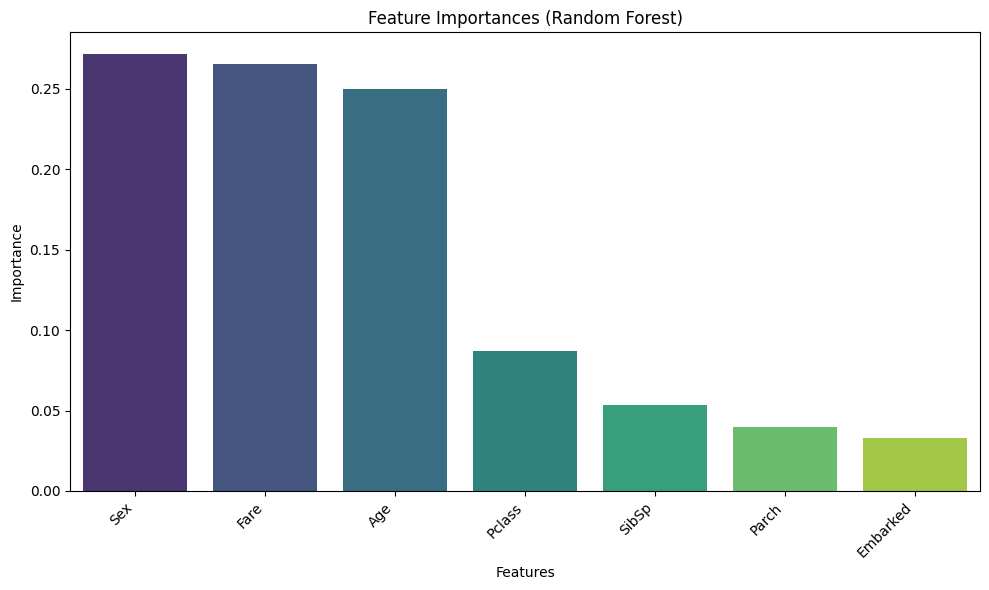

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To address the `FutureWarning` from `seaborn` and ensure best practices, I will modify the `sns.barplot` call by assigning `x` to `hue` and setting `legend=False` while retaining the `palette='viridis'` for visual consistency.



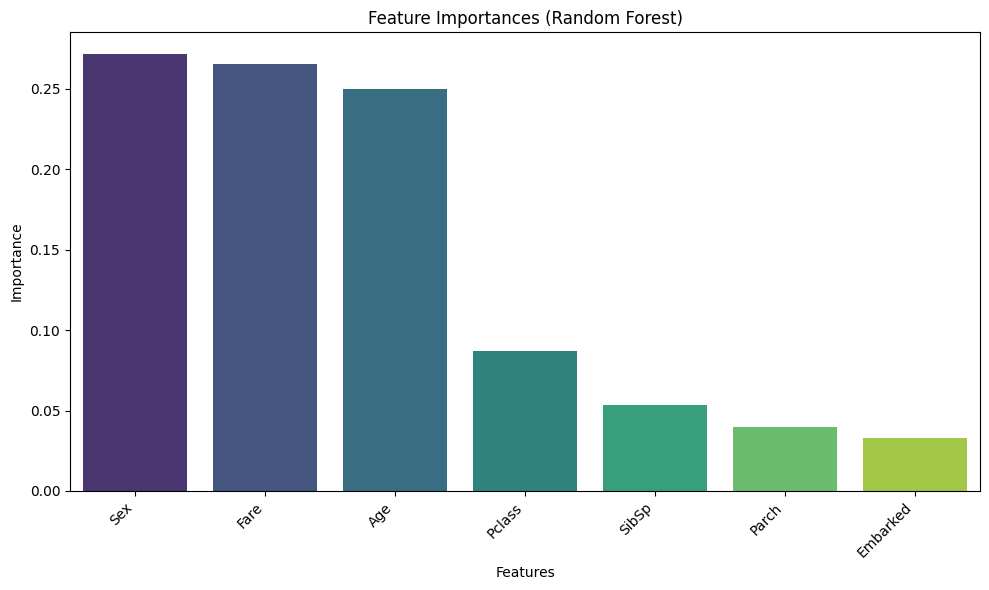

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, hue=sorted_feature_importances.index, palette='viridis', legend=False)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Identify Low Importance Features

### Subtask:
Identify features with low importance scores that are candidates for removal.


### Identifying Low Importance Features

From the `sorted_feature_importances` Series and the bar chart visualization, we can observe the following importance scores:

- **Sex**: 0.271410
- **Fare**: 0.265010
- **Age**: 0.249995
- **Pclass**: 0.086957
- **SibSp**: 0.053685
- **Parch**: 0.039897
- **Embarked**: 0.033044

Upon reviewing these scores, **Parch** and **Embarked** show significantly lower importance compared to other features, with scores of approximately 0.040 and 0.033 respectively. While 'SibSp' is also relatively low at 0.054, 'Parch' and 'Embarked' stand out as the lowest. A reasonable threshold for 'low importance' could be considered below 0.05, or observing a clear drop-off.

Therefore, **Parch** and **Embarked** are identified as features with low importance and are potential candidates for removal in subsequent steps if feature selection is deemed necessary to simplify the model or improve performance.

## Remove Low Importance Features (Optional)

### Subtask:
Drop the identified low importance features ('Parch' and 'Embarked') from the dataset.


## Summary:

### Q&A
**Which features are identified as having low importance?**
'Parch' (0.039897) and 'Embarked' (0.033044) are identified as features with low importance scores.

### Data Analysis Key Findings
*   The Random Forest model identified 'Sex', 'Fare', and 'Age' as the most important features in predicting survival, with importance scores of 0.271, 0.265, and 0.250, respectively.
*   'Pclass' and 'SibSp' showed moderate importance, with scores of 0.087 and 0.054.
*   'Parch' and 'Embarked' exhibited the lowest importance scores, at 0.040 and 0.033, respectively, making them candidates for removal.

### Insights or Next Steps
*   Consider dropping 'Parch' and 'Embarked' from the dataset to potentially simplify the model, reduce noise, and evaluate if this improves model performance without significant loss of information.
